<img src="https://gist.githubusercontent.com/nesnoj/6ee605cd3494fa6e3e848385c4afbe19/raw/a883b1bdc69c0c5bbb0b00ba92f43033aa86ec64/dingo_model.png" alt="DINGO Model" width="800"  align="center">

In [1]:
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
%%capture

from ding0.core import NetworkDing0
from ding0.tools.logger import setup_logger
from ding0.tools.results import save_nd_to_pickle
from ding0.tools.plots import plot_mv_topology
from egoio.tools import db
from sqlalchemy.orm import sessionmaker
import oedialect

from ding0.tools import results # to load pickl file


# create new network
nd = NetworkDing0(name='network')


# set ID of MV grid district
mv_grid_districts = [40] # fn

In [3]:
import osmnx as ox

import networkx as nx 

import pandas as pd
from sqlalchemy import func              
from geoalchemy2.shape import to_shape 


from shapely.geometry import Point, Polygon, LineString



import folium

In [4]:
from config.config_lv_grids_osm import get_config_osm
from config.db_conn_local import create_session_osm 

from grid.lv_grid.routing import build_graph_from_ways, \
get_location_substation_at_pi, subdivide_graph_edges, \
get_mvlv_subst_loc_list, get_cluster_graph_and_nodes, \
add_mv_load_station_to_mvlv_subst_list

from grid.lv_grid.geo import convertCoords

from grid.lv_grid.parameterization import parameterize_by_load_profiles
#from grid.lv_grid.clustering import 

from grid.lv_grid.geo import get_Point_from_x_y, get_points_in_load_area, \
get_convex_hull_from_points

#### SET DING0 SETTINGS

In [5]:
# TODO set in config file
ding0_default=False
retain_all=False #  weil sonst graphen außerhalb des polys unverbunden zum graphen beibehalten werden

In [6]:
engine = db.connection(section='oedb_dialect', readonly=True)
session = sessionmaker(bind=engine)()

In [13]:
%%time

print('ding0_default', ding0_default)
if ding0_default:
    
    lv_stations, lv_grid_districts = nd.import_mv_grid_districts(session, mv_grid_districts_no=mv_grid_districts)

else:
    
    id_db, row, simp_graph, geo_load_area, buildings_w_loads_df, street_loads = nd.import_mv_grid_districts(
        session, ding0_default, mv_grid_districts_no=mv_grid_districts)
    
    #d_db, row, simp_graph, geo_load_area, buildings_w_loads_df, street_loads = nd.import_mv_grid_districts(
    #    session, ding0_default, mv_grid_districts_no=mv_grid_districts)

ding0_default False
Begin topologically simplifying the graph...
Simplified graph: 162 to 108 nodes, 328 to 220 edges
Wall time: 2.98 s


In [ ]:
import geopandas as gpd
nodes, edges = ox.graph_to_gdfs(simp_graph)

# geo_load_area to gpd
crs = {'init': 'epsg:3035'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[geo_load_area])

m = folium.Map([47.70490, 9.48181], zoom_start=16)
folium.GeoJson(edges).add_to(m)
folium.GeoJson(nodes).add_to(m)
folium.GeoJson(polygon).add_to(m)
m

In [10]:
import geopandas as gpd
nodes, edges = ox.graph_to_gdfs(graph_subdiv)

# geo_load_area to gpd
crs = {'init': 'epsg:3035'}
polygon = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[geo_load_area])

m = folium.Map([47.70490, 9.48181], zoom_start=16)
folium.GeoJson(edges).add_to(m)
folium.GeoJson(nodes).add_to(m)
folium.GeoJson(polygon).add_to(m)
m

In [7]:
poly = 'POLYGON((4281997.41869224 2732185.07316504,4281998.88075016 2732195.14230024,4281998.01576282 2732213.92516569,4281993.61512521 2732232.20571892,4281985.83757831 2732249.32453903,4281974.9636758 2732264.66411145,4281961.38566396 2732277.67110312,4281945.59333238 2732287.87632242,4281928.15634618 2732294.91164401,4281909.70369689 2732298.52328794,4281899.89836158 2732299.48902918,4281899.80062908 2732299.51867601,4281899.71055828 2732299.56681985,4281899.63161057 2732299.63161056,4281899.56681985 2732299.71055828,4281899.51867601 2732299.80062907,4281899.48902918 2732299.89836158,4281899 2732304.86355813,4281899 2732400,4281897.32744326 2732418.12094891,4281892.36628708 2732435.62960862,4281884.28416412 2732451.93437859,4281873.35416141 2732466.48433653,4281859.9455931 2732478.78785356,4281844.51152164 2732488.42920582,4281827.57344925 2732495.08262142,4281809.70369689 2732498.52328794,4281799.89836158 2732499.48902918,4281799.80062908 2732499.51867601,4281799.71055828 2732499.56681985,4281799.63161057 2732499.63161056,4281799.56681985 2732499.71055828,4281799.51867601 2732499.80062907,4281799.48902918 2732499.89836158,4281799 2732504.86355813,4281799 2732595.13644187,4281799.48902918 2732600.10163842,4281799.51867601 2732600.19937093,4281799.56681985 2732600.28944172,4281799.63161057 2732600.36838944,4281799.71055828 2732600.43318015,4281799.80062908 2732600.48132399,4281799.89836158 2732600.51097082,4281804.86355813 2732601,4281895.13644187 2732601,4281900.10163842 2732600.51097082,4281905.52122057 2732598.86695855,4281911.05481399 2732596.52729832,4281928.59387086 2732592.63659849,4281946.54726737 2732591.97962414,4281964.32378142 2732594.57801004,4281976.90843708 2732598.84446971,4281979.1233037 2732599.34140188,4281979.22510906 2732599.34381457,4281983.25367623 2732598.63851471,4281986.23346757 2732597.64747867,4282050.98250327 2732572.50907546,4282052.67774805 2732571.81526867,4282054.35848586 2732571.09153676,4282056.02745182 2732570.33670197,4282088.89368292 2732554.74796176,4282092.06044497 2732553.10647598,4282095.15571594 2732551.36064439,4282098.19866948 2732549.49965245,4282146.71482044 2732517.41992253,4282163.72714343 2732508.41445931,4282182.16056123 2732502.87130051,4282201.31821599 2732501,4282295.13644187 2732501,4282300.10163842 2732500.51097082,4282300.19937092 2732500.48132399,4282300.28944172 2732500.43318015,4282300.36838943 2732500.36838944,4282300.43318015 2732500.28944172,4282300.48132399 2732500.19937093,4282300.51097082 2732500.10163842,4282301 2732495.13644187,4282301 2732494.32793279,4282303.03682233 2732474.34938989,4282309.06347831 2732455.19292259,4282318.83198354 2732437.6467798,4282331.9403843 2732422.43294888,4282347.84929708 2732410.17744743,4282365.90410312 2732401.38456392,4282385.3618846 2732396.41610726,4282405.42199416 2732395.47651914,4282425.25899991 2732398.60446167,4282444.0566502 2732405.67122648,4282449.67425281 2732408.46281173,4282449.77100851 2732408.48861632,4282453.94272214 2732408.73951837,4282457.16272239 2732408.44779934,4282577.86753831 2732391.37758309,4282581.11134693 2732390.74380087,4282585.17543061 2732389.25874244,4282585.25573357 2732389.20837591,4282585.32378301 2732389.14238633,4282585.37659329 2732389.06366895,4282585.41184738 2732388.97567747,4282586.14909619 2732384.71203595,4282586.19482672 2732381.40720873,4282581.60244345 2732262.57045071,4282582.53680519 2732244.65468309,4282586.68904681 2732227.20169909,4282593.92281594 2732210.78462428,4282598.15490424 2732204.55179615,4282600.48132399 2732200.19937093,4282600.51097082 2732200.10163842,4282601 2732195.13644187,4282601 2732104.86355813,4282600.51097082 2732099.89836158,4282600.48132399 2732099.80062907,4282600.43318015 2732099.71055828,4282600.36838943 2732099.63161056,4282600.28944172 2732099.56681985,4282600.19937092 2732099.51867601,4282600.10163842 2732099.48902918,4282595.13644187 2732099,4282504.86355813 2732099,4282499.89836158 2732099.48902918,4282499.80062908 2732099.51867601,4282499.71055828 2732099.56681985,4282499.63161057 2732099.63161056,4282499.56681985 2732099.71055828,4282499.51867601 2732099.80062907,4282498.35223764 2732103.64586105,4282495.68536327 2732116.63952152,4282487.45377848 2732135.52967954,4282475.4900696 2732152.30664972,4282460.31252617 2732166.24362334,4282442.57866683 2732176.73682548,4282423.05675446 2732183.33167163,4282415.8951919 2732184.94459055,4282411.41722228 2732186.84480967,4282402.2575052 2732191.66318818,4282383.91324626 2732197.14848334,4282364.85616923 2732199,4282304.86355813 2732199,4282299.89836158 2732199.48902918,4282299.80062908 2732199.51867601,4282299.71055828 2732199.56681985,4282299.63161057 2732199.63161056,4282294.90222514 2732205.39438339,4282281.00817311 2732219.25746108,4282264.65228409 2732230.10709237,4282246.47742844 2732237.51683104,4282227.1979713 2732241.19543635,4282207.57169427 2732240.99832021,4282188.37001077 2732236.93323032,4282170.34764553 2732229.15994555,4282154.21297 2732217.98399591,4282140.60015974 2732203.84465357,4282130.04426807 2732187.29766726,4282122.9601957 2732168.99341848,4282117.39278732 2732148.8749034,4282116.37935611 2732145.8336756,4282114.43388927 2732142.06657956,4282114.37280666 2732141.99157426,4282114.29762866 2732141.93070433,4282114.21155693 2732141.88656208,4282114.11825708 2732141.86102743,4282114.02170253 2732141.85518784,4282109.82721968 2732142.47338469,4282106.76606956 2732143.42494621,4282073.36180495 2732155.73464355,4282070.54683642 2732156.92501199,4282067.17110368 2732158.95342197,4282065.9512084 2732160.04307885,4282050.6794854 2732171.25385801,4282033.55190822 2732179.35035063,4282015.19567907 2732184.03606773,4281997.41869224 2732185.07316504))'

In [36]:
from shapely import wkt

In [12]:
graph.graph.get('crs')

'epsg:3035'

In [31]:
import shapely.geometry
import geopandas as gpd


### clustering

In [8]:
from grid.lv_grid.clustering import get_cluster_numbers, apply_AgglomerativeClustering

In [9]:
n_cluster = get_cluster_numbers(buildings_w_loads_df)
#todo reset n_cluster
n_cluster = 4
labels = apply_AgglomerativeClustering(simp_graph, n_cluster)

In [10]:
%%time

cluster_graph, nodes_w_labels = get_cluster_graph_and_nodes(simp_graph, labels)
mvlv_subst_list = get_mvlv_subst_loc_list(cluster_graph, nodes_w_labels, street_loads, labels, n_cluster)

Wall time: 259 ms


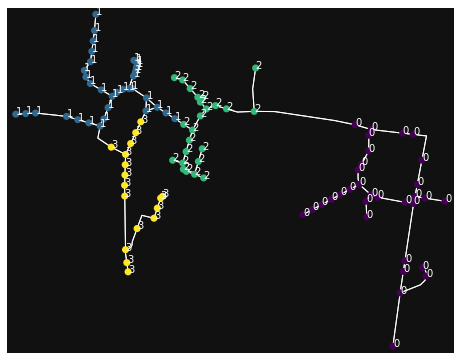

In [11]:
X = []    # collect nodes
for node in simp_graph.nodes:
    X.append((simp_graph.nodes[node]['x'],simp_graph.nodes[node]['y']))

xy = list(zip(*X))
x = xy[0]
y = xy[1]

nc = ox.plot.get_node_colors_by_attr(cluster_graph, attr='cluster')
fig, ax = ox.plot_graph(cluster_graph, node_color=nc, node_size=50, edge_color='w', edge_linewidth=1, show=False, close=False)

for i, l in enumerate(labels):
    
    ax.text(x[i], y[i], s=l, c='white')

In [12]:
# get loadds on mv level
#mv_lv_level_threshold = get_config_osm('mv_lv_threshold_capacity')
# TODO weg mit den 40 wg testing
mv_lv_level_threshold = 40

loads_mv_df = buildings_w_loads_df.loc[buildings_w_loads_df.capacity >= mv_lv_level_threshold]

#assign cluster id to loads on mv level
mv_cluster_ids = list(range(n_cluster, n_cluster + len(loads_mv_df)))
loads_mv_df['cluster'] = mv_cluster_ids


# map cluster to buildings of lv level
buildings_w_loads_df = buildings_w_loads_df[~buildings_w_loads_df.index.isin(loads_mv_df.index.tolist())]
buildings_w_loads_df['cluster'] = buildings_w_loads_df.nn.map(nodes_w_labels.cluster)


# concat lv and mv level after assignment of cluster ids
buildings_w_loads_df = pd.concat([buildings_w_loads_df, loads_mv_df])


In [13]:
# todo
# 1. lon lat to xy for loads_mv_df
loads_mv_df[['x','y']] = loads_mv_df.apply(lambda x: convertCoords(x.nn_coords.x, x.nn_coords.y, 4326, 3035),axis=1)

# 2. xy to lon lat for synthetic (or all after 1)

C:\Users\Robert\anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Robert\anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:306: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\Users\Robert\anaconda3\envs\ox\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. Wh

In [14]:
%%time

mvlv_subst_list = add_mv_load_station_to_mvlv_subst_list(loads_mv_df, mvlv_subst_list, nodes_w_labels)

Wall time: 26 ms


In [16]:
mvlv_subst_list

[{'x': 4282465.613186001,
  'y': 2732307.0927902046,
  'node_type': 'non_synthetic',
  'lon': 9.486881299999999,
  'lat': 47.70317630000739,
  'cluster': 0,
  'osmid': 329334526,
  'load_level': 'lv'},
 {'x': 4282038.495855372,
  'y': 2732459.481623211,
  'node_type': 'non_synthetic',
  'lon': 9.481180199999999,
  'lat': 47.70452090000708,
  'cluster': 1,
  'osmid': 331517321,
  'load_level': 'lv'},
 {'x': 4282171.9559385115,
  'y': 2732383.5311303716,
  'node_type': 'non_synthetic',
  'lon': 9.482964199999998,
  'lat': 47.703845800007244,
  'cluster': 2,
  'osmid': 443336608,
  'load_level': 'lv'},
 {'x': 4282081.426960234,
  'y': 2732230.693110299,
  'node_type': 'synthetic',
  'cluster': 3,
  'osmid': 614390618601,
  'load_level': 'lv'},
 {'x': 4282194.3060774645,
  'y': 2732456.6350696296,
  'node_type': 'non_synthetic',
  'lon': 9.483255199999999,
  'lat': 47.70450509625661,
  'cluster': 4,
  'osmid': 443338172,
  'load_level': 'mv'}]

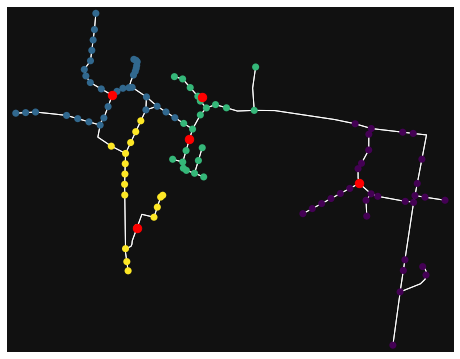

In [17]:
nc = ox.plot.get_node_colors_by_attr(cluster_graph, attr='cluster')
fig, ax = ox.plot_graph(cluster_graph, node_color=nc, node_size=50, edge_color='w', edge_linewidth=1, show=False, close=False)

for mvlv_subst_loc in mvlv_subst_list:
    
    ax.scatter(mvlv_subst_loc['x'],mvlv_subst_loc['y'],s=70,c='red')



In [21]:
row

zensus_sum                                                               261.0
zensus_cnt                                                                18.0
ioer_sum                                                                  None
ioer_cnt                                                                  None
area                                                                 21.629852
sector_area_residential                                              11.895053
sector_area_retail                                                         NaN
sector_area_industrial                                                     NaN
sector_area_agricultural                                                   NaN
sector_share_residential                                              0.549937
sector_share_retail                                                        NaN
sector_share_industrial                                                    NaN
sector_share_agricultural                           

In [20]:
id_db

5588

In [18]:
from shapely.geometry import MultiPoint, Point, shape
from grid.lv_grid.geo import get_points_in_load_area, get_convex_hull_from_points

In [28]:
# init empty stations_df
lv_stations = pd.DataFrame(columns=['la_id', 'geom'])
lv_stations.index.name = 'mvlv_subst_id'

In [29]:
# add stations for cluster load centers
last_row_ix = len(lv_stations)
for mvlv_subst_loc in mvlv_subst_list:
    
    cluster_id = mvlv_subst_loc.get('cluster')
    # TODO: check lon lat instead x, y?
    lv_stations.loc[last_row_ix+cluster_id] = [id_db, Point(mvlv_subst_loc.get('x'),mvlv_subst_loc.get('y'))]


C:\Users\Robert\anaconda3\envs\ox\lib\site-packages\pandas\core\dtypes\cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


In [30]:
%%time

ch_polys = []

for cluster_i in range(len(mvlv_subst_list)):

    # get convex hull per cluster
    cluster_geo_list = buildings_w_loads_df.loc[buildings_w_loads_df.cluster==cluster_i].geometry.tolist()

    points = get_points_in_load_area(cluster_geo_list)

    polygon = get_convex_hull_from_points(points)
    
    ch_polys.append(polygon)

Wall time: 66.9 ms


In [31]:
lv_stations

,la_id,geom
mvlv_subst_id,,
0,5588,POINT (4282465.613186001 2732307.092790205)
1,5588,POINT (4282038.495855372 2732459.481623211)
2,5588,POINT (4282171.955938512 2732383.531130372)
3,5588,POINT (4282081.426960234 2732230.693110299)
4,5588,POINT (4282194.306077464 2732456.63506963)


In [11]:
lv_stations.head(2)

,la_id,geom
mvlv_subst_id,,
2873,2520,POINT(9.49063792246541 47.7452397283099)
3053,2728,POINT(9.49342672911522 47.7327193529698)


In [32]:
nodes, edges = ox.graph_to_gdfs(cluster_graph)

m = folium.Map([polygon.centroid.y, polygon.centroid.x], zoom_start=16)
for polygon in ch_polys:
    folium.GeoJson(polygon).add_to(m)
folium.GeoJson(edges).add_to(m)
m


In [ ]:
# init empty stations_df
lv_grid_districts = pd.DataFrame(columns=['la_id', 'geom'])
lv_grid_districts.index.name = 'mvlv_subst_id'

In [12]:
lv_grid_districts.head(2)

,la_id,population,peak_load_residential,peak_load_retail,peak_load_industrial,peak_load_agricultural,peak_load,geom,sector_count_residential,sector_count_retail,sector_count_industrial,sector_count_agricultural,sector_consumption_residential,sector_consumption_retail,sector_consumption_industrial,sector_consumption_agricultural
mvlv_subst_id,,,,,,,,,,,,,,,,
419093,5372,10.0,3.493570,0.0,0.0,99.525989,103.019559,MULTIPOLYGON(((9.44476423426424 47.69930354485...,0.0,0.0,0.0,2.0,16346.482102,0.0,0.0,414070.515734
420154,4830,3.0,1.048071,0.0,0.0,0.000000,1.048071,MULTIPOLYGON(((9.49954883830014 47.68339565373...,1.0,0.0,0.0,0.0,4903.944631,0.0,0.0,0.000000


In [22]:
# update load areal peak loads in the end 
# due to residentials at feeder needs to be updated
buildings_w_loads_df.capacity.sum()

250.2653091931388

In [ ]:
# additionally for object
# lv_grid as lv_grid-Obect

# df
la_id
population
peak_load_residential
peak_load_retail
peak_load_industrial
peak_load_agricultural
peak_load
geom
sector_count_residential
sector_count_retail
sector_count_industrial
sector_count_agricultural
sector_consumption_residential
sector_consumption_retail
sector_consumption_industrial
sector_consumption_agricultural

In [15]:
# district e.g.
'id_db': 4563,
'geo_data': <shapely.geometry.multipolygon.MultiPolygon at 0x17ffc430160>,
'lv_load_area': lv_load_area_4544,
'lv_grid': lv_grid_4563,
'population': 80,
'peak_load_residential': 27.9485612387548,
'peak_load_retail': 0.0,
'peak_load_industrial': 0.0,
'peak_load_agricultural': 0.0,
'peak_load': 27.9485612387548,
'sector_count_residential': 1,
'sector_count_retail': 0,
'sector_count_industrial': 0,
'sector_count_agricultural': 0,
'sector_consumption_residential': 130771.856816184,
'sector_consumption_retail': 0.0,
'sector_consumption_industrial': 0.0,
'sector_consumption_agricultural': 0.0

,category,area,geometry,raccordement_building,name,number_households,n_amenities_inside,osm_id_building,geometry_amenity,x,y,capacity,nn,nn_dist,nn_coords
443340114,restaurant,732.547,"POLYGON ((9.483392699999998 47.70459640000707,...",POINT (9.48352605 47.70469195000704),Sportplatz-Restaurant,1.0,1.0,301431136.0,0101000020e6100000c3d3861e8cf72240da9a83ea30da...,9.483526,47.704692,67.035376,443338172,29.025206,POINT (9.483255199999999 47.70450509625661)


In [ ]:
# todo check if truncate creates subgrpahs
# if len(subgraphs) > 1:
    # there are unconnected subgraphs
    # then for each subgraph
        # cluserting
        # for each cluster
            # build lv_grid_district

### Clustering

In [27]:
n_clusters = get_n_cluster(buildings_w_loads_df)
if n_clusters < len(fn_fallenbrunnen_la._lv_grid_districts):
    n_clusters = len(fn_fallenbrunnen_la._lv_grid_districts)
buildings_w_loads_df = cluster_k_means(buildings_w_loads_df, n_clusters)

In [29]:
n_clusters

3

### Update and add _districts

In [30]:
for i in range(n_clusters):
    
    print(len(buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==i)]))


99
85
79


In [28]:
buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==0)]

,category,capacity,area,number_households,x,y,geometry,raccordement,nn,nn_dist,Cluster
osm_id,,,,,,,,,,,
8598838279,ice_cream,20.966863,229.121,0.645161,9.437183,47.674769,"POLYGON ((9.437094099999998 47.67477800001394,...",POINT (9.437183076702567 47.67476938145773),475940044,19.021132,0
144020300,public_building,244.695822,2113.09,0.8125,9.438239,47.675506,"POLYGON ((9.437905999999998 47.67551250001376,...",POINT (9.438238891069723 47.67550616796044),1576023053,34.831012,0
144023114,school,102.108142,1641.61,0.552632,9.438521,47.673818,"POLYGON ((9.438203599999998 47.67375600001416,...",POINT (9.438521488700175 47.67381754064048),68844093,33.677840,0
314909001,residential,1.246721,100,0.72973,9.43711,47.674319,"POLYGON ((9.4370154 47.67431780001401, 9.43711...",POINT (9.437109750000001 47.67431900001404),2080880814,14.638173,0
314909020,house,1.102239,100,0.645161,9.437548,47.674401,"POLYGON ((9.4374646 47.674413400014, 9.4375446...",POINT (9.437548450000001 47.67440130001403),314975344,15.374000,0
...,...,...,...,...,...,...,...,...,...,...,...
314913916,residential,2.904399,100,1.7,9.436301,47.672468,"POLYGON ((9.436173800000001 47.67246730001447,...",POINT (9.436301343479869 47.67246766666069),311379901,30.431139,0
338514542,school,407.558658,6552.39,0.594203,9.438414,47.673881,"POLYGON ((9.437957300000001 47.67387860001414,...",POINT (9.438414351486788 47.67388107322754),68844093,31.901109,0
401560706,residential,1.102239,100,0.645161,9.43769,47.674448,"POLYGON ((9.4376228 47.674467300014, 9.4377058...",POINT (9.437690147469656 47.67444791593603),314975344,27.030240,0


In [16]:
%%time

geometry = buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==0), 'geometry'].tolist()

points = get_points_in_load_area(geometry)
        
len(points)

Wall time: 9.38 ms


140

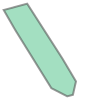

In [17]:
get_convex_hull_from_points(points)

In [24]:
fn_fallenbrunnen_la.lv_load_area_group.__dict__

{'id_db': 20,
 'mv_grid_district': mv_grid_district_40,
 '_lv_load_areas': [lv_load_area_4544,
  lv_load_area_4545,
  lv_load_area_4548,
  MVCableDist_mvgd_40_26],
 'peak_load': 65.35928151751943,
 'branch_length_sum': 0,
 'peak_load_max': 1000.0,
 'branch_length_max': 2000.0,
 'root_node': MVCableDist_mvgd_40_23}

In [28]:
nd._mv_grid_districts[0].__dict__

{'id_db': 40,
 'mv_grid': mv_grid_40,
 '_lv_load_areas': [lv_load_area_2128,
  lv_load_area_2292,
  lv_load_area_2383,
  lv_load_area_2520,
  lv_load_area_2521,
  lv_load_area_2561,
  lv_load_area_2608,
  lv_load_area_2625,
  lv_load_area_2633,
  lv_load_area_2705,
  lv_load_area_2728,
  lv_load_area_2763,
  lv_load_area_2765,
  lv_load_area_2840,
  lv_load_area_2842,
  lv_load_area_3029,
  lv_load_area_3088,
  lv_load_area_3089,
  lv_load_area_3119,
  lv_load_area_3160,
  lv_load_area_3235,
  lv_load_area_3277,
  lv_load_area_3304,
  lv_load_area_3305,
  lv_load_area_3307,
  lv_load_area_3311,
  lv_load_area_3314,
  lv_load_area_3403,
  lv_load_area_3413,
  lv_load_area_3645,
  lv_load_area_3661,
  lv_load_area_3731,
  lv_load_area_3780,
  lv_load_area_3805,
  lv_load_area_3911,
  lv_load_area_3986,
  lv_load_area_3987,
  lv_load_area_3992,
  lv_load_area_4212,
  lv_load_area_4337,
  lv_load_area_4347,
  lv_load_area_4487,
  lv_load_area_4488,
  lv_load_area_4544,
  lv_load_area_4545,

In [17]:
fn_fallenbrunnen_la._lv_grid_districts[0].lv_grid._station.__dict__

{'id_db': 4563,
 'geo_data': <shapely.geometry.point.Point at 0x118800eba90>,
 'grid': lv_grid_4563,
 '_transformers': [Transformer_lv_grid_4563_1],
 'v_level_operation': None,
 'lv_load_area': lv_load_area_4544,
 'voltage_res': [0.9897135909377942, 1.0123145234795161]}

In [17]:
preprocessed_clusters = []   
    

for cluster_id in range(n_clusters):
    
    if cluster_id < len(fn_fallenbrunnen_la._lv_grid_districts):
        
        print('delete or update _lv_grid_districts[', cluster_id, ']')
        
        # GET NEW VALUES FOR DISTRICT        
        # get convex hull of cluster
        points = get_points_in_load_area(buildings_w_loads_df.loc[buildings_w_loads_df['Cluster']==cluster_id])
        district_convex_hull = get_convex_hull_from_points(points)
        
        # get location of substation for cluster
        station_x, station_y = get_location_substation_at_pi(graph, buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==0)])

        
        # UPDATE VALUES
        # update values of _lv_grid_districts[cluster_id]
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].geo_data  = district_convex_hull
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].poulation = buildings_w_loads_df.loc[buildings_w_loads_df['Cluster']==cluster_id]['number_households'].sum()
        
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].peak_load = buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==0)]['capacity'].sum()
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].peak_load_residential = buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==cluster_id) & buildings_w_loads_df['number_households'] > 0]['capacity'].sum()
        
        
        # ADD / RESET DING0 ELEMENTS
        # update position of substation
        fn_fallenbrunnen_la._lv_grid_districts[0].lv_grid._station.geo_data = get_Point_from_x_y(station_x, station_y)
        
        # reset list to add new elements
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].lv_grid._station.transformers.clear()
        
        
        # update trafo and loads
        #fn_fallenbrunnen_la._lv_grid_districts[cluster_id].lv_grid.build_grid()
        
        
    else:
        
        print('add _lv_grid_districts id', cluster_id)
        
        
        
        
        
    break
    

update _lv_grid_districts 0
add _lv_grid_districts id 1
add _lv_grid_districts id 2


In [21]:
fn_fallenbrunnen_la._lv_grid_districts[0].lv_grid._station.__dict__

{'id_db': 4563,
 'geo_data': <shapely.geometry.point.Point at 0x1d50cd257f0>,
 'grid': lv_grid_4563,
 '_transformers': [Transformer_lv_grid_4563_1],
 'v_level_operation': None,
 'lv_load_area': lv_load_area_4544,
 'voltage_res': [0.9897135909377942, 1.0123145234795161]}

In [19]:
#lv_district_of_interest.lv_grid.graph_draw(mode='LV')

In [16]:
lv_district_of_interest.lv_grid.__dict__ # .geo_data.wkt

NameError: name 'lv_district_of_interest' is not defined

In [19]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [20]:
X = []    # collect nodes

for node in graph.nodes:

    X.append([graph.nodes[node]['X'], graph.nodes[node]['Y']])
    
    
X = np.array(X)



# clustering

adj_mat_sparse = nx.adjacency_matrix(graph, weight='length')

clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=adj_mat_sparse).fit(X)






# assign cluster labels

i_label = 0

for node in list(graph.nodes):

    graph.nodes[node]['cluster'] = clustering.labels_[i_label]
    
    i_label += 1
    
labels = nx.get_node_attributes(graph, 'cluster') 

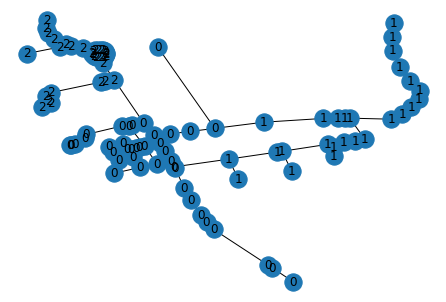

In [23]:
nx.draw(graph, node_coords_dict,labels=labels)

In [24]:
X = []    # collect nodes

for node in graph.nodes:

    X.append([graph.nodes[node]['X'], graph.nodes[node]['Y']])
    
    
X = np.array(X)



# clustering

adj_mat_sparse = nx.to_numpy_matrix(graph, weight='length')

clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=adj_mat_sparse).fit(X)






# assign cluster labels

i_label = 0

for node in list(graph.nodes):

    graph.nodes[node]['cluster'] = clustering.labels_[i_label]
    
    i_label += 1
    
labels = nx.get_node_attributes(graph, 'cluster') 

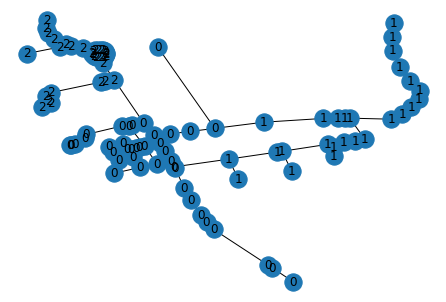

In [25]:
nx.draw(graph, node_coords_dict,labels=labels)